In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import sys

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
    sys.path.append("AITech-forecasting")
    os.system("git clone https://github.com/DominikHuss/AITech-forecasting.git; \
               cd AITech-forecasting; \
               git checkout dev; \
               pip install -r requirements.txt")

In [1]:
import jax.numpy as jnp
import jax

import matplotlib.pyplot as plt

In [7]:
def get_seasonality(T, beta):
    t = jnp.arange(T)

    fraction = 2 * jnp.pi / 10
    fraction = t * fraction
    sins = jnp.sin(fraction)
    coss = jnp.cos(fraction)
    S = jnp.stack((sins,coss), axis=1)
    return t, S@beta

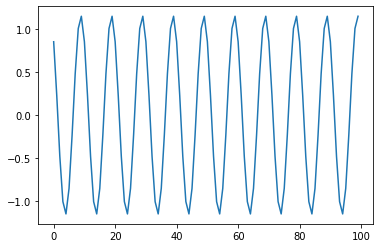

In [13]:
key = jax.random.PRNGKey(0)
x, y = get_seasonality(100, jax.random.normal(key, (2,)))
plt.plot(x,y)
plt.show()

In [14]:


def get_seasonality2(T, O, p, beta):
    t = jnp.arange(T)

    o = jnp.arange(1, O+1)
    arg = 2*jnp.pi*o[:, jnp.newaxis]/p
    arg = t[:, jnp.newaxis]*arg.reshape(arg.size)
    S = jnp.concatenate([jnp.sin(arg), jnp.cos(arg)], axis=-1)
    return t, S@beta

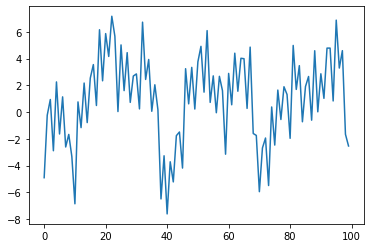

In [17]:
O = 3
p = jnp.array([7, 15, 31, 64, 122])

key = jax.random.PRNGKey(0)
x, y = get_seasonality2(100, O, p, jax.random.normal(key, (2*O*p.shape[0],)))
plt.plot(x,y)
plt.show()